<a href="https://colab.research.google.com/github/andreasstephani/AML_2019_Group-2/blob/master/Gradient_Descent_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AML_2019, Gradient Descent, Coursework Part 1, Group 2

Source: https://github.com/alanchalk/aml_2019_gd

##Contents


###1. Background
###2. Set up the directory
###3.   Six-Hump Camel Function
###4.   Plain Vanilla Gradient Descent
###5.   Nesterov's Accelarated Gradient (NAG)
###6.   ADAM 
###7.  Comparison



##Background

###Why is gradient descent important in machine learning?

Gradient descent is an optimization technique which can be used to minimise a function. This is a very important and useful tool in machine learning. Machine Learning models have a loss function, which is a way to determine how well the model has performed given the different values of each of its parameters. Therefore, gradient descent can be used to find the parameter values that minimise the loss function of the model (i.e. find the parameters that give the lowest loss). An example can be a linear regression model where the parameters are the beta coefficients and the loss function is the mean squared error (MSE). Thus, gradient descent could be used to find the beta coefficients that minimise the MSE of the linear regression model.

### How does plain vanilla gradient descent work?

Plain vanilla gradient descent can be used to minimise a function (i.e. find the minimum point). The procedure involves taking steps from a starting point on the loss function by evaluating the gradient at each step and adjusting the parameters, until the minimum point is reached. The very first step is usually a downhill movement from the starting point towards the direction specified by the gradient at that point - i.e. opposite direction to the gradient. Then, the gradient at the new point is recalculated, and another step is taken in the direction that it specifies. For every step, the gradient of the loss function is calculated and the parameters are adjusted in the opposite direction. This process is repeated until the global minimum of the function or a point where no more downhill movement can be made (i.e. a local minimum) is reached.

###Two modifications of plain vanilla gradient descent

Gradient descent has the limitation of long running time because it uses the whole set of data to determine the next step. Therefore, stochastic gradient descent (SGD) is used which uses a subset of the data to find the next step. As a result, SGD sometimes cannot find the global minimum but it can get a very close approximation.



Nesterov's Accelarated Gradient (NAG) and ADAM  are two modifications of the plain vanilla gradient descent .

NAG algorithm tries to calculate the gradient a litte bit ahead of the current position in order to prevent overshooting. ADAM algorithm takes into consideration the first and second moments of the gradients in order to adjust the parameters and minimise the loss function.

##Set up the directory

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/AML/Coursework Part 1

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/AML/Coursework Part 1


Now the modules needed for this notebook are imported. Note that the gradient descent class containing (a) Plain Vanilla, (b) Nesterov's Accelarated Gradient and (c) Adam created by Group 2 is imported (i.e. import gd - the class which does gradient descent is stored as a separate module (gd) and the directory should be set where the python class is stored).

In [0]:
import gd
from gd import gd_group2_2d
import os
import numpy as np
import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
import time

**Notes**


The gd_group2_2d contains 4 flavours of gradient descent:


1.   Plain Vanilla
2.   Momentum
3.   Nesterov's Accelarated Gradient (NAG)
4.   ADAM

But only plain vanilla, NAG and ADAM are going to be used for this coursework.



##Six-Hump Camel Function

The function chosen to be minimised is the Six-Hump Camel Function. Its equation is as follows: 


$ f(x_1,x_2) = 4x_1^2 - 2.1x_1^4 +x_1^6/3 + x_1x_2 - 4x_2^2 + 4x_2^4$

This function has two global minimum points:

$ f(x_1,x_2) = -1.0316$    at $(x_1,x_2) = (0.0898, -0.7126)$ and $(-0.0898,0.7126)$.






In [0]:
def fn_loss(x_1,x_2):  
    return (4*x_1**2) - 2.1*x_1**4 + (x_1**6)/3 + x_1*x_2 - 4*x_2**2 + 4*x_2**4  #The Six-Hump Camel Function is defined as the loss function 
    
def fn_grad1(x_1,x_2):
    return 8*x_1 - 8.4*x_1**3 + 2*x_1**5 + x_2  #This is the partial derivative of the function with respect to x_1
    
def fn_grad2(x_1,x_2): 
    return x_1 - 8*x_2 + 16*x_2**3  #This is the partial derivative of the function with respect to x_2
    

The Six-Hump Camel Function can be visualised by the following graphs:

Text(0.5, 0, 'loss function')

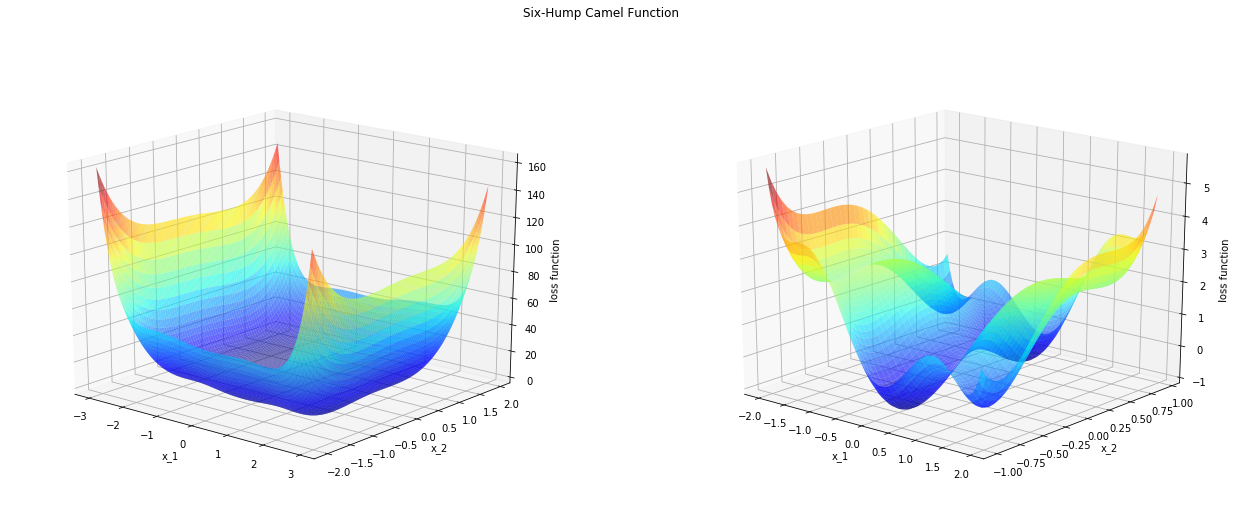

In [0]:

fig = plt.figure(figsize=(22,8))
plt.suptitle("Six-Hump Camel Function")

#First subplot
ax1 = fig.add_subplot(1, 2, 1, projection='3d',elev=20, azim=-50)
x_1 = np.arange(-3, 3, 0.05)
x_2 = np.arange(-2, 2, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)
ax1.plot_surface(x_1, x_2, z, cmap=plt.cm.jet, rstride=1, cstride=1,alpha=0.6, linewidth=0)
ax1.set_xlabel('x_1')
ax1.set_ylabel('x_2')
ax1.set_zlabel('loss function')



#Second subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d', elev=20, azim=-50)
x_1 = np.arange(-2, 2, 0.05)
x_2 = np.arange(-1, 1, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)
ax2.plot_surface(x_1, x_2, z, cmap=plt.cm.jet, rstride=1, cstride=1, alpha=0.6, linewidth=0)
ax2.set_xlabel('x_1')
ax2.set_ylabel('x_2')
ax2.set_zlabel('loss function')

##Plain Vanilla

###Initial Guess

In [0]:
#Loss Function: Six-Hump Camel Function 

def fn_loss(x_1,x_2):  
    return (4*x_1**2) - 2.1*x_1**4 + (x_1**6)/3 + x_1*x_2 - 4*x_2**2 + 4*x_2**4  #The Six-Hump Camel Function is defined as the loss function 
    
def fn_grad1(x_1,x_2):
    return 8*x_1 - 8.4*x_1**3 + 2*x_1**5 + x_2  #This is the partial derivative of the function with respect to x_1
    
def fn_grad2(x_1,x_2): 
    return x_1 - 8*x_2 + 16*x_2**3  #This is the partial derivative of the function with respect to x_2
    

The **starting** **point** is set to $(1,1)$ and the **step-size, eta**, (a.k.a as learning rate) is set to $0.001$. 


It can be observed that the plain vanilla gradient descent finds the global minimum of the loss function in $1839$ steps. The loss path until convergence can be observed on the graph below where it is plotted together with the loss function.

In [0]:
#Initializing 'solver' using gd_group2_2d class and the functions defined above.
solver = gd_group2_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
solver.find_min(x_1_init=1, x_2_init=1, n_iter = 10000, eta=0.001, tol=1e-5) #using the find_min function to minimise the loss function using plain vanilla

Converged in 1839 steps.  Loss fn = -1.031628453483402 achieved by x_1 = -0.08984072319727252 and x_2 = 0.7126562546861168


Text(0.5, 0.92, 'Loss Function and Loss Function Path until convergence using Plain Vanilla Gradient Descent')

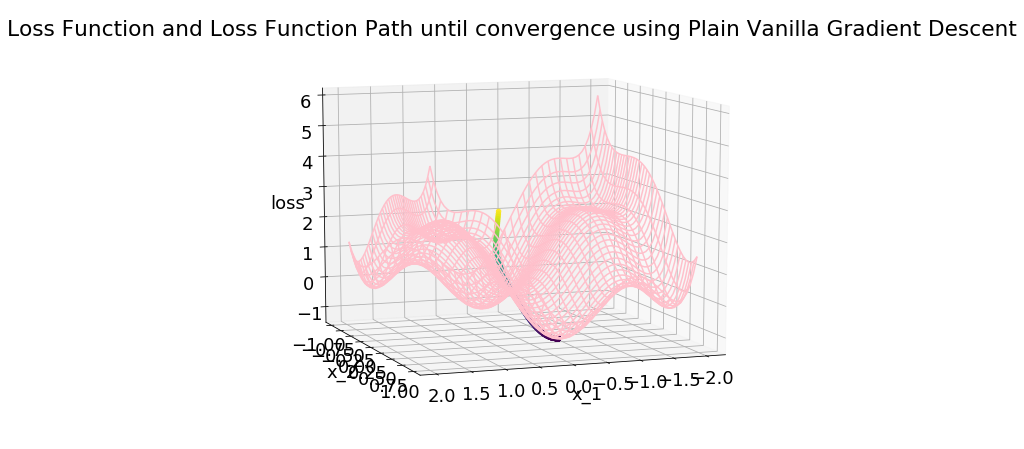

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d", elev=10, azim=70)

z_points = solver.loss_path
x_points = solver.x1_path
y_points = solver.x2_path

x_1 = np.arange(-2, 2, 0.05)
x_2 = np.arange(-1, 1, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)

ax.plot_wireframe(x_1, x_2, z, color ='pink')
ax.scatter3D(x_points, y_points, z_points,c=z_points);
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('loss')
ax.set_title('Loss Function and Loss Function Path until convergence using Plain Vanilla Gradient Descent')


Now, the starting point is changed to $(2,1)$ to see if there is any effect.

It can be observed that the plain vanilla gradient descent converges in $1562$  steps but it does not find the global minimum. It converges to $(1.6071,0.5687)$ which it looks to be a saddle point as demonstrated on the graph below.


In [0]:
solver = gd_group2_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
solver.find_min(x_1_init=2, x_2_init=1, n_iter = 10000, eta=0.001, tol=1e-5)

Converged in 1562 steps.  Loss fn = 2.1042503103191175 achieved by x_1 = 1.6071042272730514 and x_2 = 0.5686528444122516


Text(0.5, 0.92, 'Loss Function and Loss Function Path until convergence using Plain Vanilla Gradient Descent')

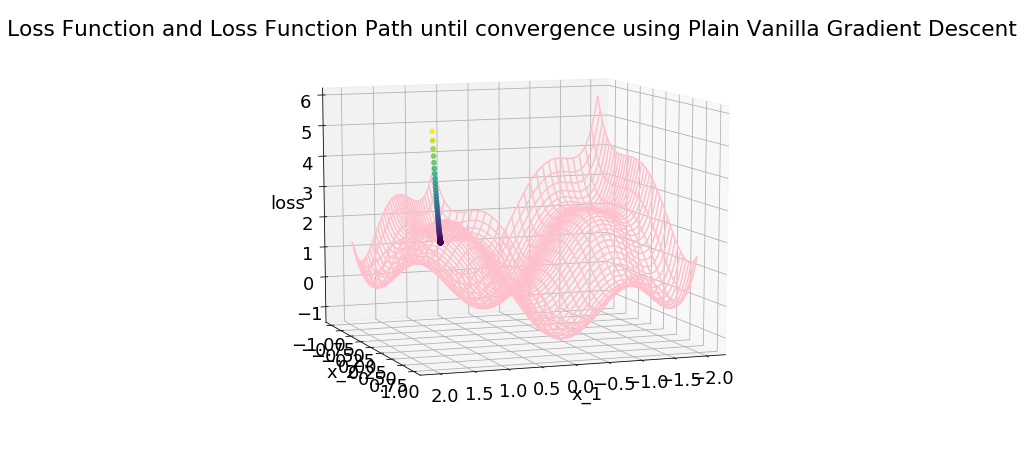

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d", elev=10, azim=70)

z_points = solver.loss_path
x_points = solver.x1_path
y_points = solver.x2_path

x_1 = np.arange(-2, 2, 0.05)
x_2 = np.arange(-1, 1, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)

ax.plot_wireframe(x_1, x_2, z, color ='pink')
ax.scatter3D(x_points, y_points, z_points,c=z_points);
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('loss')
ax.set_title('Loss Function and Loss Function Path until convergence using Plain Vanilla Gradient Descent')


###Experiments with different step-sizes

Firstly, experiments are carried out with different values of the **eta** parameter (i.e. step-size) in the range of $[0.001, 0.01]$. The starting point is set at $(1,1)$. The results can be seen in Table 1 below.

In [0]:
eta_path=[] #initialise a list to record the eta path
stepsnum_path=[] #initialise a list to record the stepsize path

for i in range (1,11):
  k=(i/1000)
  tolerance=1e-5
  solver.find_min(x_1_init=1, x_2_init=1, n_iter = 10000, eta=k, tol=tolerance)
  if solver.g_x1>tolerance or solver.g_x2>tolerance: #this condition is to stop the loop if there is divergence
    break
  eta_path.append(k)
  stepsnum_path.append(solver.num_step)

Converged in 1839 steps.  Loss fn = -1.031628453483402 achieved by x_1 = -0.08984072319727252 and x_2 = 0.7126562546861168
Converged in 918 steps.  Loss fn = -1.0316284534836149 achieved by x_1 = -0.08984074461145354 and x_2 = 0.7126562571487091
Converged in 611 steps.  Loss fn = -1.031628453483824 achieved by x_1 = -0.08984076597096412 and x_2 = 0.7126562596050128
Converged in 457 steps.  Loss fn = -1.0316284534838438 achieved by x_1 = -0.08984076799243752 and x_2 = 0.7126562598374943
Converged in 365 steps.  Loss fn = -1.0316284534840503 achieved by x_1 = -0.0898407894900242 and x_2 = 0.7126562623096735
Converged in 303 steps.  Loss fn = -1.0316284534838875 achieved by x_1 = -0.0898407725012591 and x_2 = 0.7126562603560305
Converged in 260 steps.  Loss fn = -1.031628453484536 achieved by x_1 = -0.08984084157413648 and x_2 = 0.7126562682992279
Converged in 227 steps.  Loss fn = -1.0316284534846445 achieved by x_1 = -0.08984085357761265 and x_2 = 0.7126562696796067
Converged in 201 ste

**Table 1**


Experiment|eta|Steps|Minimum found
---|---|---|---|
1|0.001|1839|(-0.0898 , 0.7126)
2|0.002|918|(-0.0898 , 0.7126)
3|0.003|611|(-0.0898 , 0.7126)
4|0.004|457|(-0.0898 , 0.7126)
5|0.005|365|(-0.0898 , 0.7126)
6|0.006|303|(-0.0898 , 0.7126)
7|0.007|260|(-0.0898 , 0.7126)
8|0.008|227|(-0.0898 , 0.7126)
9|0.009|201|(-0.0898 , 0.7126)
10|0.01|181|(-0.0898 , 0.7126)

It can be observed from Table 1 that as **eta** increases, the number of steps that plain vanilla gradient descent requires to converge are decreasing as well. It is worth noting that all the values of eta on Table 1 find the global minimum.

Now, four values of eta with a larger difference between them are taken. A graph is created below to visualise the loss path and how it is affected by the different values of eta, and see whether there is convergence to the global minimun. 

Converged in 1839 steps.  Loss fn = -1.031628453483402 achieved by x_1 = -0.08984072319727252 and x_2 = 0.7126562546861168
Converged in 181 steps.  Loss fn = -1.0316284534850202 achieved by x_1 = -0.08984089592540144 and x_2 = 0.712656274549502
Converged in 34 steps.  Loss fn = -1.031628453488639 achieved by x_1 = -0.08984196883041201 and x_2 = 0.7126567879868784
Did not converge


Text(0.5, 1.0, 'Loss Path against Number of steps for different step-sizes (eta)')

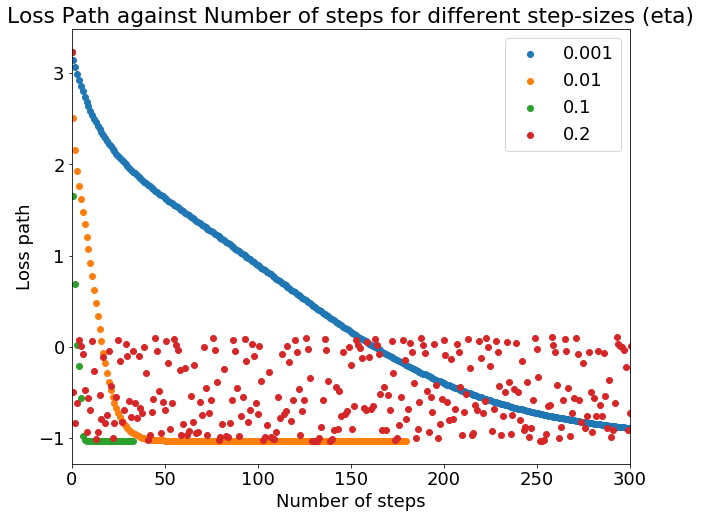

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
eta = [0.001, 0.01, 0.1, 0.2]
for r in eta :
    solver.find_min(x_1_init =1, x_2_init = 1, n_iter = 10000, eta = r, tol = tolerance)
    x_range = range(len(solver.loss_path))
    ax1.scatter(x_range, solver.loss_path)      
plt.xlim((0,300))
ax1.legend(eta)
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Loss path')
ax1.set_title('Loss Path against Number of steps for different step-sizes (eta)')

The results of the graph are summarised below in Table 2.

**Table 2**

eta|Steps|Minimum found
---|---|---|
0.001|1839|(-0.0898 , 0.7126)
0.01|181|(-0.0898 , 0.7126)
0.1|34|(-0.0898 , 0.7126)
0.2|Did not converge| 

The graph shows the loss path and the steps to convergence for four different values of eta (i.e $0.001,0.01,0.1,0.2$). It can be observed that as the value of eta increases the steps needed for convergence decrease. However, if eta is high it might cause the algorithm not to converge and this is the case with **eta** = $0.2$ (i.e. red points on graph). The red points show that the algorithm jumps from point to point and does not follow a specific pattern - divergence occurs and the global minimum is not found. 

Then, further experiments are carried out with different values of the **eta** parameter (i.e. step-size) in the range of $[0.0002, 0.2]$,  so that the value of eta that reduces the number of iterations to converge is deduced. 

In [0]:
eta_path=[] #initialise a list to record the eta path
stepsnum_path=[] #initialise a list to record the step number path

for i in range (1,1001):
  k=(i/5000)
  tolerance=1e-5
  solver.find_min(x_1_init=1, x_2_init=1, n_iter = 10000, eta=k, tol=tolerance)
  if solver.g_x1>tolerance or solver.g_x2>tolerance: #this condition is to stop the loop if there is divergence
    break
  eta_path.append(k) #each time the loop does not break, the k value of eta is added to the eta_path list - to record the eta path
  stepsnum_path.append(solver.num_step) #each time the loop does not break, the number of steps is added to the stepsnum_path list to record the step number path


Converged in 9211 steps.  Loss fn = -1.0316284534833093 achieved by x_1 = -0.08984071404347069 and x_2 = 0.7126562536334381
Converged in 4604 steps.  Loss fn = -1.0316284534833529 achieved by x_1 = -0.08984071831831214 and x_2 = 0.7126562541250379
Converged in 3068 steps.  Loss fn = -1.0316284534833755 achieved by x_1 = -0.08984072060225944 and x_2 = 0.712656254387689
Converged in 2300 steps.  Loss fn = -1.0316284534833988 achieved by x_1 = -0.08984072289124473 and x_2 = 0.7126562546509208
Converged in 1839 steps.  Loss fn = -1.031628453483402 achieved by x_1 = -0.08984072319727252 and x_2 = 0.7126562546861168
Converged in 1532 steps.  Loss fn = -1.0316284534834446 achieved by x_1 = -0.08984072748431034 and x_2 = 0.7126562551791185
Converged in 1313 steps.  Loss fn = -1.031628453483527 achieved by x_1 = -0.08984073572189759 and x_2 = 0.712656256126423
Converged in 1148 steps.  Loss fn = -1.0316284534834907 achieved by x_1 = -0.08984073209746961 and x_2 = 0.7126562557096272
Converged in

Text(0.5, 1.0, 'Number of steps against eta')

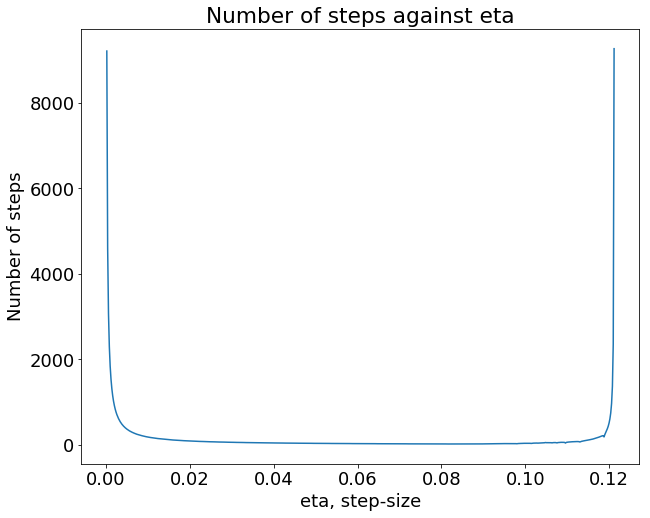

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(eta_path, stepsnum_path)
ax1.set_xlabel('eta, step-size')
ax1.set_ylabel('Number of steps')
ax1.set_title('Number of steps against eta')



A graph of the number of steps needed to convergence against eta is plotted and by finding the minimum point of the graph, the value of eta that gives the lowest number of steps can be found.

In [0]:
eta_path[np.argmin(stepsnum_path)] # find the value of eta that gives the lowest number of steps.

0.0854

In [0]:
solver.find_min(x_1_init=1, x_2_init=1, n_iter = 10000, eta=0.0854, tol=1e-5) #run the algorithm with the value of eta found above to find the number of steps taken

Converged in 17 steps.  Loss fn = -1.0316284534889282 achieved by x_1 = -0.08984163247904166 and x_2 = 0.7126561617852684


The value of eta that gives the lowest number of iterations to converge at the global minimum of $(-0.0898, 0.7126)$ is deduced to be $0.0854$ and the number of steps taken is $17$. It can also be visualised on the graph below.

Text(0.5, 0.92, 'Loss Function and Loss Function Path until convergence for eta = 0.0854')

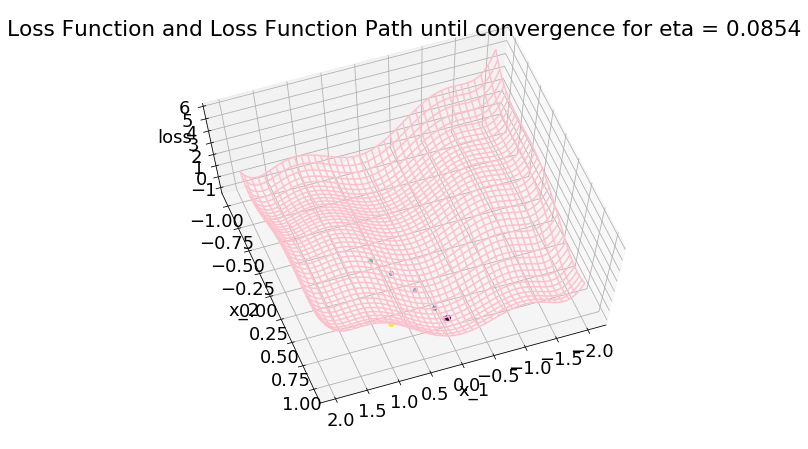

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d", elev=70, azim=70)

z_points = solver.loss_path
x_points = solver.x1_path
y_points = solver.x2_path

x_1 = np.arange(-2, 2, 0.05)
x_2 = np.arange(-1, 1, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)

ax.plot_wireframe(x_1, x_2, z, color ='pink')
ax.scatter3D(x_points, y_points, z_points,c=z_points);
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('loss')
ax.set_title('Loss Function and Loss Function Path until convergence for eta = 0.0854')

##Nesterov's Accelarated Gradient (NAG)

###Initial Guess

In [0]:
#Loss Function: Six-Hump Camel Function 

def fn_loss(x_1,x_2):  
    return (4*x_1**2) - 2.1*x_1**4 + (x_1**6)/3 + x_1*x_2 - 4*x_2**2 + 4*x_2**4  #The Six-Hump Camel Function is defined as the loss function 
    
def fn_grad1(x_1,x_2):
    return 8*x_1 - 8.4*x_1**3 + 2*x_1**5 + x_2  #This is the partial derivative of the function with respect to x_1
    
def fn_grad2(x_1,x_2): 
    return x_1 - 8*x_2 + 16*x_2**3  #This is the partial derivative of the function with respect to x_2

The **starting** **point** is set to $(1,1)$ and the **step-size, eta** is set to $0.001$. 

It can be observed that NAG converges in $371$ steps which is much faster than plain vanilla gradient descent but it finds a close approximation of the global minimum of the loss function  -  i.e. $(-0.0833, 0.6614)$.

In [0]:
solver = gd_group2_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
solver.nag(x_1_init=1, x_2_init=1, n_iter = 10000, eta=0.001, tol=1e-5,alpha=0.95)

Converged in 371 steps.  Loss fn = -1.0118180134711667 achieved by x_1 = -0.08328704647457667 and x_2 =0.6614375615516191


Text(0.5, 0.92, 'Loss Function and Loss Function Path until convergence using NAG')

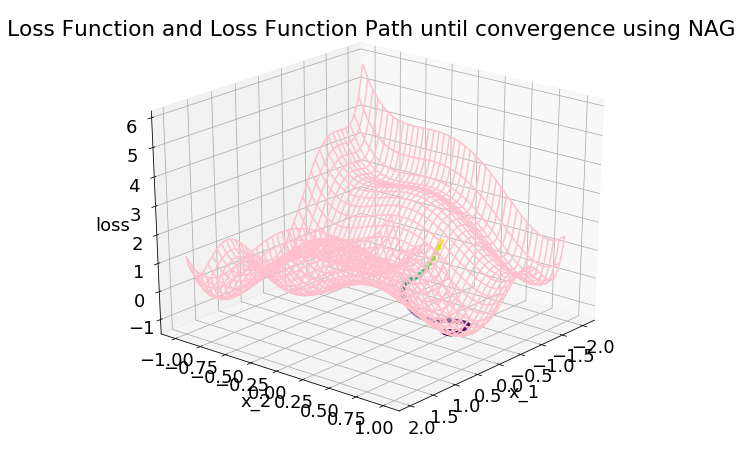

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d", elev=25, azim=40)

z_points = solver.loss_path
x_points = solver.x1_path
y_points = solver.x2_path

x_1 = np.arange(-2, 2, 0.05)
x_2 = np.arange(-1, 1, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)

ax.plot_wireframe(x_1, x_2, z, color ='pink')
ax.scatter3D(x_points, y_points, z_points,c=z_points);
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('loss')
ax.set_title('Loss Function and Loss Function Path until convergence using NAG')


Now, the starting point is changed to $(2,1)$ to see if there is any effect.

It can be observed that NAG converges in $399$  steps but it does not find the global minimum. It converges to $(-0.0833,0.6614)$ which is a close approximation of the global minimum. It converges faster than plain vanilla and goes over the saddle point that plain vanilla was stuck at when experimenting with the $(2,1)$ starting point. 

In [0]:
solver = gd_group2_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
solver.nag(x_1_init=2, x_2_init=1, n_iter = 10000, eta=0.001, tol=1e-5,alpha=0.95)

Converged in 399 steps.  Loss fn = -1.011818216763832 achieved by x_1 = -0.083287696642167 and x_2 =0.6614378345419105


Text(0.5, 0.92, 'Loss Function and Loss Function Path until convergence using NAG')

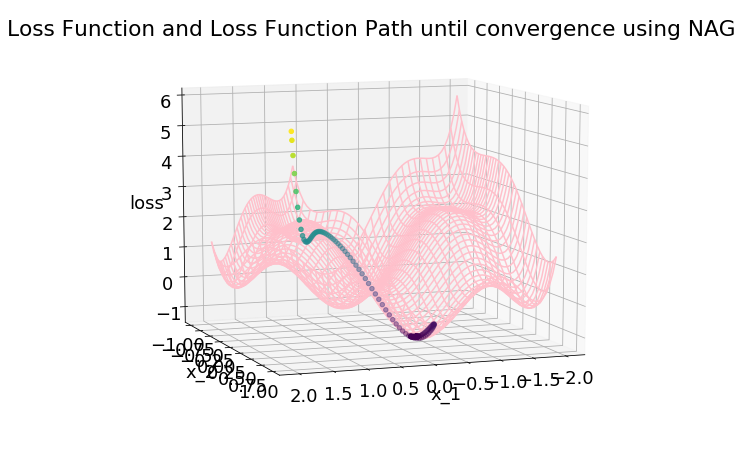

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d", elev=10, azim=70)

z_points = solver.loss_path
x_points = solver.x1_path
y_points = solver.x2_path

x_1 = np.arange(-2, 2, 0.05)
x_2 = np.arange(-1, 1, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)

ax.plot_wireframe(x_1, x_2, z, color ='pink')
ax.scatter3D(x_points, y_points, z_points,c=z_points);
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('loss')
ax.set_title('Loss Function and Loss Function Path until convergence using NAG')


###Experiments with different step-sizes

Firstly, experiments are carried out with different values of the **eta** parameter (i.e. step-size) in the range of $[0.001, 0.01]$. The starting point is set at $(1,1)$. The results can be seen in Table 3 below.

In [0]:
eta_path=[] #initialise a list to record the eta path
stepsnum_path=[] #initialise a list to record the stepsize path

for i in range (1,11):
  k=(i/1000)
  tolerance=1e-5
  solver.nag(x_1_init=1, x_2_init=1, n_iter = 10000, eta=k, tol=tolerance, alpha=0.95)
  if solver.g_x1>tolerance or solver.g_x2>tolerance: #this condition is to stop the loop if there is divergence
    break
  eta_path.append(k)
  stepsnum_path.append(solver.num_step)

Converged in 371 steps.  Loss fn = -1.0118180134711667 achieved by x_1 = -0.08328704647457667 and x_2 =0.6614375615516191
Converged in 332 steps.  Loss fn = -1.0118177817727698 achieved by x_1 = -0.08328313803517226 and x_2 =0.6614372504406051
Converged in 290 steps.  Loss fn = -1.0118181274303832 achieved by x_1 = -0.08328714624084163 and x_2 =0.6614377145748958
Converged in 250 steps.  Loss fn = -1.0118181798825308 achieved by x_1 = -0.08328816853591926 and x_2 =0.6614377850315812
Converged in 238 steps.  Loss fn = -1.0118183408716475 achieved by x_1 = -0.083281814872049 and x_2 =0.6614380012272246
Converged in 217 steps.  Loss fn = -1.0118183136738268 achieved by x_1 = -0.08328236798738757 and x_2 =0.6614379646873978
Converged in 187 steps.  Loss fn = -1.0118182647658915 achieved by x_1 = -0.08329190742363705 and x_2 =0.6614378991960976
Converged in 162 steps.  Loss fn = -1.0118176585119303 achieved by x_1 = -0.08327092576309554 and x_2 =0.661437085980617
Converged in 164 steps.  Lo

**Table 3**


Experiment|eta|Steps|Minimum found
---|---|---|---|
1|0.001|371|(-0.0833 , 0.6614)
2|0.002|332|(-0.0833 , 0.6614 )
3|0.003|290|(-0.0833 , 0.6614)
4|0.004|250|(-0.0833 , 0.6614)
5|0.005|238|(-0.0833 , 0.6614)
6|0.006|217|(-0.0833 , 0.6614)
7|0.007|187|(-0.0833 , 0.6614)
8|0.008|162|(-0.0833 , 0.6614)
9|0.009|164|(-0.0833 , 0.6614)
10|0.01|167|(-0.0833 , 0.6614)

It can be observed from Table 3 that for the first eight experiments, as **eta** increases, the number of steps that NAG requires to converge is decreasing as well. For experiments $9$ and $10$ there is a slight increase in the number of steps as eta increases. In addition, the minimum that NAG finds is not the global minimum of the loss function but it is a close approximation. This suggests that NAG is not minimising fully the loss function and overshoots the global minimum even though it converges faster than the plain vanilla gradient descent. 

A graph is also created below to visualise the loss path and how it is affected by four chosen different values of eta, and see whether there is convergence to the global minimum. 

Converged in 371 steps.  Loss fn = -1.0118180134711667 achieved by x_1 = -0.08328704647457667 and x_2 =0.6614375615516191
Converged in 167 steps.  Loss fn = -1.0118182357856798 achieved by x_1 = -0.08328371349815539 and x_2 =0.6614378600678896
Converged in 50 steps.  Loss fn = -1.0118182117394243 achieved by x_1 = 0.08328618968876961 and x_2 =-0.6614378277694828
Converged in 27 steps.  Loss fn = -1.0118182117143801 achieved by x_1 = 0.08328276047264536 and x_2 =-0.6614378277661482


Text(0.5, 1.0, 'Loss Path against Number of Steps for different step-sizes')

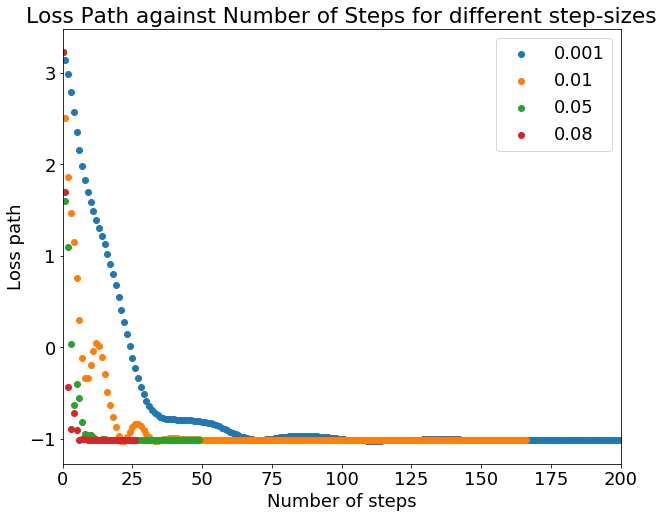

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
eta = [0.001, 0.01, 0.05, 0.08]
for r in eta :
    solver.nag(x_1_init =1, x_2_init = 1, n_iter = 10000, eta = r, tol = tolerance, alpha=0.95)
    x_range = range(len(solver.loss_path))
    ax1.scatter(x_range, solver.loss_path)      
plt.xlim((0,200))
ax1.legend(eta)
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Loss path')
ax1.set_title('Loss Path against Number of Steps for different step-sizes')

The results of the graph can summarised below in table 4.

**Table 4**

eta|Steps|Minimum found
---|---|---|
0.001|371|(-0.0833 , 0.6614)
0.01|167|(-0.0833 , 0.6614)
0.05|50|(0.0833 , -0.6614)
0.08|27| (0.0833 , -0.6614)

The graph shows the loss path and the steps to convergence for four different values of eta (i.e $0.001,0.01,0.05,0.08$). It can be observed that as the value of eta increases the steps needed for convergence decrease. However, it can be observed that there are some fluctuations and the curves are not as smooth as the plain vanilla. Also, it is worth noting that $0.05$ and $0.08$ give the same approximation of the global minimum but with a different sign. The Six-Hump camel function has two global minimums with opposite signs which implies that as eta increases NAG can move and find an approximation of the second global minimum.

Then, further experiments are carried out with different values of the **eta** parameter (i.e. step-size) in the range of $[0.00001, 0.06]$,  so that the value of eta that reduces the number of iterations to converge is deduced. 

In [0]:
eta_path=[] #initialise a list to record the eta path
stepsnum_path=[] #initialise a list to record the step number path

for i in range (1,6001):
  k=(i/100000)
  tolerance=1e-5
  solver.nag(x_1_init=1, x_2_init=1, n_iter = 10000, eta=k, tol=tolerance,alpha=0.95)
  if solver.g_x1>tolerance or solver.g_x2>tolerance: #this condition is to stop the loop if there is divergence
    break
  eta_path.append(k) #each time the loop does not break, the k value of eta is added to the eta_path list - to record the eta path
  stepsnum_path.append(solver.num_step) #each time the loop does not break, the number of steps is added to the stepsnum_path list to record the step number path


Converged in 8857 steps.  Loss fn = -1.011818211734084 achieved by x_1 = -0.08328403751634321 and x_2 =0.6614378277668842
Converged in 4313 steps.  Loss fn = -1.0118182117336758 achieved by x_1 = -0.08328403465742844 and x_2 =0.6614378277663747
Converged in 2792 steps.  Loss fn = -1.0118182117335293 achieved by x_1 = -0.0832840341833988 and x_2 =0.6614378277661843
Converged in 2025 steps.  Loss fn = -1.0118182117334866 achieved by x_1 = -0.08328403242952657 and x_2 =0.6614378277661505
Converged in 1558 steps.  Loss fn = -1.0118182117334602 achieved by x_1 = -0.08328403017452954 and x_2 =0.6614378277661457
Converged in 1239 steps.  Loss fn = -1.011818211733504 achieved by x_1 = -0.08328403454235764 and x_2 =0.6614378277661452
Converged in 999 steps.  Loss fn = -1.0118182117346035 achieved by x_1 = -0.08328402488515099 and x_2 =0.6614378277677524
Converged in 797 steps.  Loss fn = -1.0118182116688446 achieved by x_1 = -0.08328401227712165 and x_2 =0.6614378276796242
Converged in 514 step

Text(0.5, 1.0, 'Number of steps against eta')

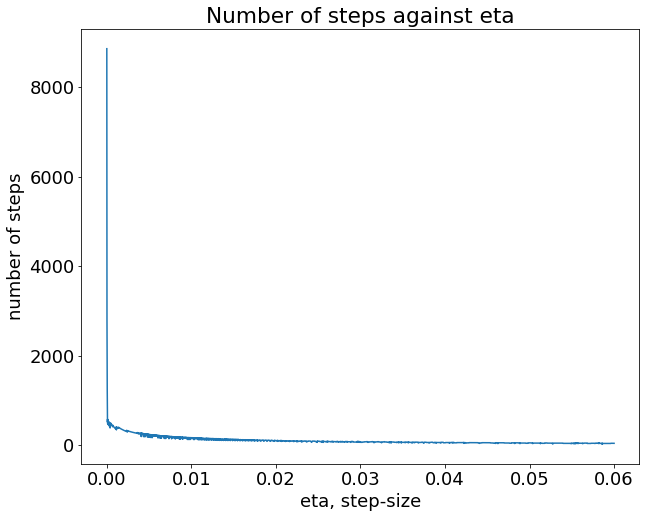

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(eta_path, stepsnum_path)
ax1.set_xlabel('eta, step-size')
ax1.set_ylabel('number of steps')
ax1.set_title('Number of steps against eta')

A graph of the number of steps needed to convergence against eta is plotted and by finding the minimum point of the graph, the value of eta that gives the lowest number of steps can be found.

In [0]:
eta_path[np.argmin(stepsnum_path)] # find the value of eta that gives the lowest number of steps.

0.05862

In [0]:
solver.nag(x_1_init=1, x_2_init=1, n_iter = 10000, eta=0.05862, tol=1e-5,alpha=0.95) #run the algorithm with the value of eta found above to find the number of steps taken

Converged in 24 steps.  Loss fn = -1.0118190980274657 achieved by x_1 = 0.08302407261109862 and x_2 =-0.6614393770181655


The value of eta that gives the lowest number of iterations to converge at a close approximation of the global minimum is deduced to be $0.05862$ and the number of steps taken is $24$. It can also be visualised on the graph below.

Text(0.5, 0.92, 'Loss Function and Loss Function Path until convergence for eta = 0.05862')

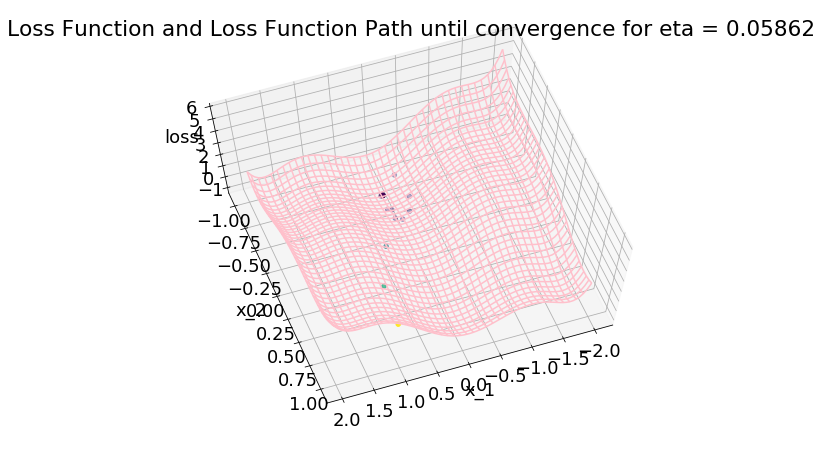

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d", elev=70, azim=70)

z_points = solver.loss_path
x_points = solver.x1_path
y_points = solver.x2_path

x_1 = np.arange(-2, 2, 0.05)
x_2 = np.arange(-1, 1, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)

ax.plot_wireframe(x_1, x_2, z, color ='pink')
ax.scatter3D(x_points, y_points, z_points,c=z_points);
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('loss')
ax.set_title('Loss Function and Loss Function Path until convergence for eta = 0.05862')

##ADAM

###Initial Guess

In [0]:
#Loss Function: Six-Hump Camel Function 

def fn_loss(x_1,x_2):  
    return (4*x_1**2) - 2.1*x_1**4 + (x_1**6)/3 + x_1*x_2 - 4*x_2**2 + 4*x_2**4  #The Six-Hump Camel Function is defined as the loss function 
    
def fn_grad1(x_1,x_2):
    return 8*x_1 - 8.4*x_1**3 + 2*x_1**5 + x_2  #This is the partial derivative of the function with respect to x_1
    
def fn_grad2(x_1,x_2): 
    return x_1 - 8*x_2 + 16*x_2**3  #This is the partial derivative of the function with respect to x_2

The **starting** **point** is set to $(1,1)$ and the **step-size, eta**  is set to $0.001$. 

It can be observed that ADAM finds the global minimum of the loss function in $1734$ steps. The loss path until convergence can be observed on the graph below where it is plotted together with the loss function.

In [0]:
solver = gd_group2_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
solver.adam(x_1_init=1, x_2_init=1, n_iter = 10000, eta=0.001, tol=1e-5,beta_1=0.95,beta_2=0.995)

Converged in 1734 steps.  Loss fn = -1.0316284534885432 achieved by x_1 = -0.0898414258393929 and x_2 =0.7126563619709995


Text(0.5, 0.92, 'Loss Function and Loss Function Path until convergence using ADAM')

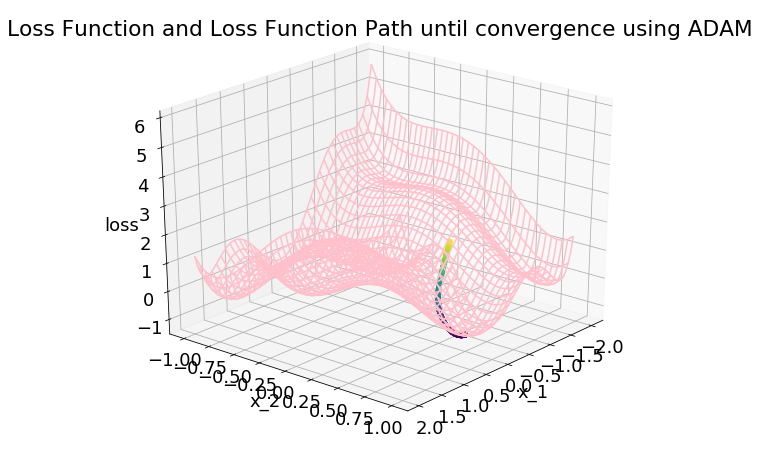

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d", elev=25, azim=40)

z_points = solver.loss_path
x_points = solver.x1_path
y_points = solver.x2_path

x_1 = np.arange(-2, 2, 0.05)
x_2 = np.arange(-1, 1, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)

ax.plot_wireframe(x_1, x_2, z, color ='pink')
ax.scatter3D(x_points, y_points, z_points,c=z_points);
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('loss')
ax.set_title('Loss Function and Loss Function Path until convergence using ADAM')


Now, the starting point is changed to $(2,1)$ to see if there is any effect.

It can be observed that ADAM converges in $1371$  steps but it does not find the global minimum. It converges to $(1.6071,0.5687)$ which seems to be a saddle point. 

In [0]:
solver = gd_group2_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1, fn_grad2 = fn_grad2)
solver.adam(x_1_init=2, x_2_init=1, n_iter = 10000, eta=0.001, tol=1e-5,beta_1=0.95,beta_2=0.995)

Converged in 1371 steps.  Loss fn = 2.1042503103166346 achieved by x_1 = 1.6071038810176033 and x_2 =0.5686508845850998


Text(0.5, 0.92, 'Loss Function and Loss Function Path until convergence using ADAM')

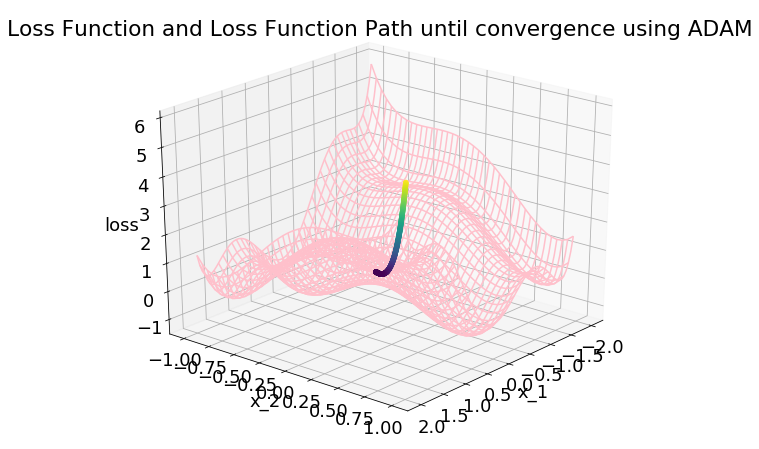

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d", elev=25, azim=40)

z_points = solver.loss_path
x_points = solver.x1_path
y_points = solver.x2_path

x_1 = np.arange(-2, 2, 0.05)
x_2 = np.arange(-1, 1, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)

ax.plot_wireframe(x_1, x_2, z, color ='pink')
ax.scatter3D(x_points, y_points, z_points,c=z_points);
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('loss')
ax.set_title('Loss Function and Loss Function Path until convergence using ADAM')


###Experiments with different step-sizes

Firstly, experiments are carried out with different values of the **eta** parameter (i.e. step-size) in the range of $[0.001, 0.01]$. The starting point is set to $(1,1)$. The results can be seen in Table 5 below.

In [0]:
eta_path=[] #initialise a list to record the eta path
stepsnum_path=[] #initialise a list to record the stepsize path

for i in range (1,11):
  k=(i/1000)
  tolerance=1e-5
  solver.adam(x_1_init=1, x_2_init=1, n_iter = 10000, eta=k, tol=tolerance,beta_1=0.95, beta_2=0.995)
  if solver.g_x1>tolerance or solver.g_x2>tolerance: #this condition is to stop the loop if there is divergence
    break
  eta_path.append(k)
  stepsnum_path.append(solver.num_step)

Converged in 1734 steps.  Loss fn = -1.0316284534885432 achieved by x_1 = -0.0898414258393929 and x_2 =0.7126563619709995
Converged in 981 steps.  Loss fn = -1.0316284534871392 achieved by x_1 = -0.08984285415515347 and x_2 =0.7126564707181343
Converged in 779 steps.  Loss fn = -1.0316284534881834 achieved by x_1 = -0.08984267473271638 and x_2 =0.7126564513401534
Converged in 581 steps.  Loss fn = -1.0316284534834441 achieved by x_1 = -0.08984088511743042 and x_2 =0.7126567637688183
Converged in 619 steps.  Loss fn = -1.0316284534861049 achieved by x_1 = -0.08984299650328058 and x_2 =0.7126564009143906
Converged in 534 steps.  Loss fn = -1.0316284534761042 achieved by x_1 = -0.08984025454113961 and x_2 =0.7126567658874647
Converged in 527 steps.  Loss fn = -1.0316284534884608 achieved by x_1 = -0.08984148755210165 and x_2 =0.7126561647149657
Converged in 529 steps.  Loss fn = -1.0316284534856186 achieved by x_1 = -0.08984268283110401 and x_2 =0.7126558887960455
Converged in 488 steps. 

**Table 5**


Experiment|eta|Steps|Minimum found
---|---|---|---|
1|0.001|1734|(-0.0898 , 0.7126)
2|0.002|981|(-0.0898 , 0.7126)
3|0.003|779|(-0.0898 , 0.7126)
4|0.004|581|(-0.0898 , 0.7126)
5|0.005|619|(-0.0898 , 0.7126)
6|0.006|534|(-0.0898 , 0.7126)
7|0.007|527|(-0.0898 , 0.7126)
8|0.008|529|(-0.0898 , 0.7126)
9|0.009|488|(-0.0898 , 0.7126)
10|0.01|539|(-0.0898 , 0.7126)

It can be observed from Table 5 that there is not a clear pattern in the number of steps taken as **eta** increases. 

A graph is also created below to visualise the loss path and how it is affected by different values of eta, and see whether there is convergence to the global minimun. 

Converged in 1734 steps.  Loss fn = -1.0316284534885432 achieved by x_1 = -0.0898414258393929 and x_2 =0.7126563619709995
Converged in 539 steps.  Loss fn = -1.031628453486733 achieved by x_1 = -0.08984281069190535 and x_2 =0.7126561628057301
Converged in 488 steps.  Loss fn = -1.0316284534820819 achieved by x_1 = -0.08984083145533803 and x_2 =0.7126557901677462
Converged in 487 steps.  Loss fn = -1.0316284534418707 achieved by x_1 = -0.08984019704974572 and x_2 =0.7126542174171062


Text(0.5, 1.0, 'Loss Path against Number of steps for different step-sizes')

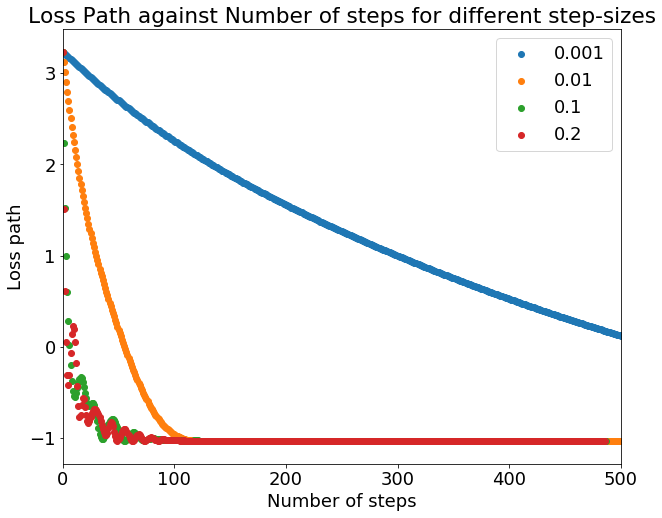

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
eta = [0.001, 0.01, 0.1, 0.2]
for r in eta :
    solver.adam(x_1_init =1, x_2_init = 1, n_iter = 10000, eta = r, tol = tolerance, beta_1=0.95, beta_2=0.995)
    x_range = range(len(solver.loss_path))
    ax1.scatter(x_range, solver.loss_path)      
plt.xlim((0,500))
ax1.legend(eta)
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Loss path')
ax1.set_title('Loss Path against Number of steps for different step-sizes')

The results of the graph as summarised below in Table 6.

**Table 6**

eta|Steps|Minimum found
---|---|---|
0.001|1734|(-0.0898 , 0.7126)
0.01|539|(-0.0898 , 0.7126)
0.1|488|(-0.0898 , 0.7126)
0.2|487| (-0.0898 , 0.7126)

The graph shows the loss path and the steps to convergence for 4 different values of eta (i.e $0.001,0.01,0.1,0.2$). It can be observed that as the value of eta increases the steps needed for convergence decrease. However, it can be observed that the number of steps do not decrease as much as for plain vanilla and NAG. Also there are some fluctuations and the curves are not as smooth as the plain vanilla. Compared with the other two flavours, ADAM does not have the same decrease on its number of steps as eta increases (i.e. takes longer for 'large' eta compared to NAG and plain vanilla) but it finds the global minimum of the function.

Then, further experiments are carried out with different values of the **eta** parameter (i.e. step-size) in the range of $[0.0002, 0.2]$,  so that the value of eta that reduces the number of iterations to converge is deduced.

In [0]:
eta_path=[] #initialise a list to record the eta path
stepsnum_path=[] #initialise a list to record the step number path

for i in range (1,1001):
  k=(i/5000)
  tolerance=1e-5
  solver.adam(x_1_init=1, x_2_init=1, n_iter = 10000, eta=k, tol=tolerance,beta_1=0.95, beta_2=0.995)
  if solver.g_x1>tolerance or solver.g_x2>tolerance: #this condition is to stop the loop if there is divergence
    break
  eta_path.append(k) #each time the loop does not break, the k value of eta is added to the eta_path list - to record the eta path
  stepsnum_path.append(solver.num_step) #each time the loop does not break, the number of steps is added to the stepsnum_path list to record the step number path


Converged in 6413 steps.  Loss fn = -1.031628453485786 achieved by x_1 = -0.08984098480563951 and x_2 =0.7126563499113087
Converged in 3564 steps.  Loss fn = -1.031628453486352 achieved by x_1 = -0.08984105845172548 and x_2 =0.7126563441623616
Converged in 2576 steps.  Loss fn = -1.0316284534862534 achieved by x_1 = -0.08984104523435012 and x_2 =0.7126563412849525
Converged in 2060 steps.  Loss fn = -1.031628453487794 achieved by x_1 = -0.08984127921988806 and x_2 =0.7126563540113806
Converged in 1734 steps.  Loss fn = -1.0316284534885432 achieved by x_1 = -0.0898414258393929 and x_2 =0.7126563619709995
Converged in 1504 steps.  Loss fn = -1.0316284534887643 achieved by x_1 = -0.08984147669929984 and x_2 =0.7126563639677188
Converged in 1330 steps.  Loss fn = -1.031628453489444 achieved by x_1 = -0.08984167834450561 and x_2 =0.7126563777655048
Converged in 1192 steps.  Loss fn = -1.0316284534893856 achieved by x_1 = -0.08984236940461368 and x_2 =0.7126564307934177
Converged in 1078 ste

Text(0.5, 1.0, 'Number of steps against eta')

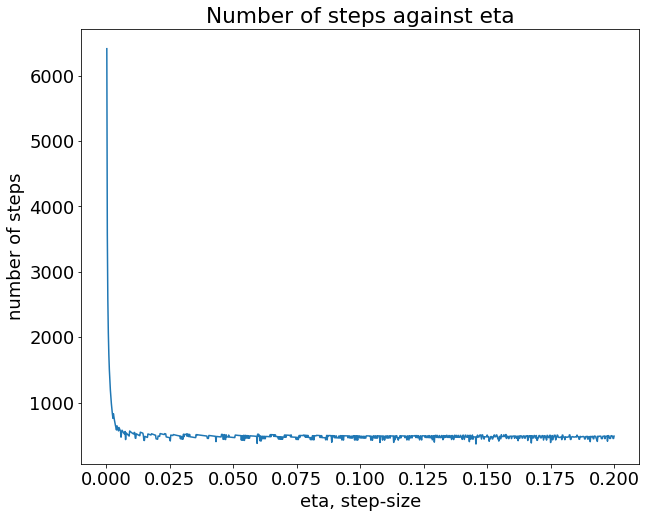

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(eta_path, stepsnum_path)
ax1.set_xlabel('eta, step-size')
ax1.set_ylabel('number of steps')
ax1.set_title('Number of steps against eta')



A graph of the number of steps needed to convergence against eta is plotted and by finding the minimum point of the graph, the value of eta that gives the lowest number of steps can be found.

In [0]:
eta_path[np.argmin(stepsnum_path)] # find the value of eta that gives the lowest number of steps.

0.1456

In [0]:
solver.adam(x_1_init=1, x_2_init=1, n_iter = 10000, eta=0.1456, tol=1e-5,beta_1=0.95, beta_2=0.995) #run the algorithm with the value of eta found above to find the number of steps taken

Converged in 366 steps.  Loss fn = -1.0316284478340552 achieved by x_1 = -0.08982258570834789 and x_2 =0.7126325806850602


The value of eta that gives the lowest number of iterations to converge at the global minimum of $(-0.0898, 0.7126)$ is deduced to be $0.1456$ and the number of steps taken is $366$. It can also be visualised on the graph below.

Text(0.5, 0.92, 'Loss Function and Loss Function Path until convergence for eta = 0.1456')

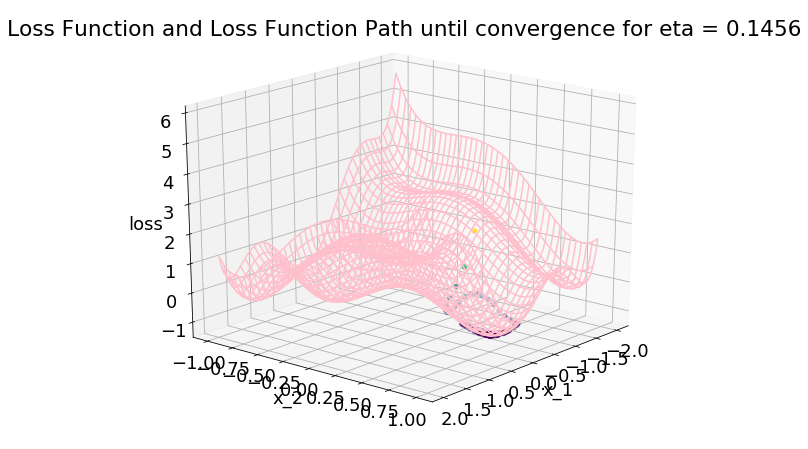

In [0]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d", elev=20, azim=40)

z_points = solver.loss_path
x_points = solver.x1_path
y_points = solver.x2_path

x_1 = np.arange(-2, 2, 0.05)
x_2 = np.arange(-1, 1, 0.05)
x_1, x_2 = np.meshgrid(x_1, x_2)
z = fn_loss(x_1, x_2)

ax.plot_wireframe(x_1, x_2, z, color ='pink')
ax.scatter3D(x_points, y_points, z_points,c=z_points);
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('loss')
ax.set_title('Loss Function and Loss Function Path until convergence for eta = 0.1456')

##Comparison

Converged in 1839 steps.  Loss fn = -1.031628453483402 achieved by x_1 = -0.08984072319727252 and x_2 = 0.7126562546861168
Converged in 371 steps.  Loss fn = -1.0118180134711667 achieved by x_1 = -0.08328704647457667 and x_2 =0.6614375615516191
Converged in 1734 steps.  Loss fn = -1.0316284534885432 achieved by x_1 = -0.0898414258393929 and x_2 =0.7126563619709995


Text(0.5, 1.0, 'Loss path against Number of Steps for the 3 different flavours of gradient descent')

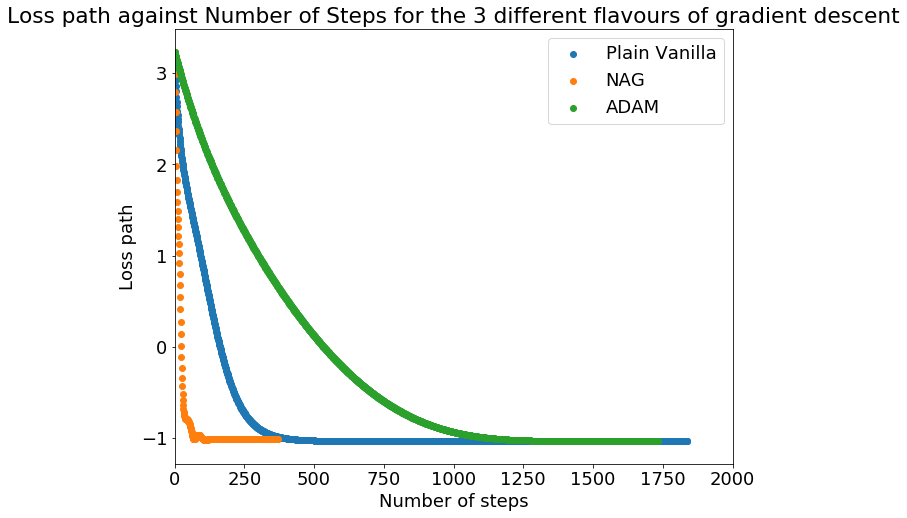

In [0]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

solver.find_min(x_1_init=1, x_2_init=1, n_iter = 10000, eta=0.001, tol=1e-5)
x_range=range(len(solver.loss_path))
ax.scatter(x_range, solver.loss_path)

solver.nag(x_1_init=1, x_2_init=1, n_iter = 10000, eta=0.001, tol=1e-5,alpha=0.95)
x_range=range(len(solver.loss_path))
ax.scatter(x_range, solver.loss_path)

solver.adam(x_1_init=1, x_2_init=1, n_iter = 10000, eta=0.001, tol=1e-5,beta_1=0.95,beta_2=0.995)
x_range=range(len(solver.loss_path))
ax.scatter(x_range, solver.loss_path)

plt.xlim((0,2000))
ax.legend(('Plain Vanilla', 'NAG', 'ADAM'))
ax.set_xlabel('Number of steps')
ax.set_ylabel('Loss path')
plt.title("Loss path against Number of Steps for the 3 different flavours of gradient descent")

**Table 7**

Flavour|Steps|Minimum found
---|---|---|
Plain Vanilla|1839|(-0.0898 , 0.7126)
NAG|371|(-0.0833 , 0.6614)
ADAM|1734|(-0.0898 , 0.7126) 

Plain vanilla finds the global minimum but it takes the longest time. It can be also observed that NAG solves the problem of the large number of steps needed for convergence but it does not minimise the function fully - it hits a very close approximation of the global minimum. ADAM does not decrease significantly the time taken but it takes into account the first and second moments of the previous gradients, which can lead to better accuracy.
